### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the data sets

In [2]:
df1 = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\Part1+-+Normal.csv')
df2 = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\Part1+-+Type_H.csv')
df3 = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\Part1+-+Type_S.csv')

### Let's print the shape and columns of three datasets

In [3]:
print("Shape of df1 is : ", df1.shape)
print("Shape of df2 is : ", df2.shape)
print("Shape of df3 is : ", df3.shape)

Shape of df1 is :  (100, 7)
Shape of df2 is :  (60, 7)
Shape of df3 is :  (150, 7)


In [4]:
df1_columns = [col for col in df1.columns]
df2_columns = [col for col in df2.columns]
df3_columns = [col for col in df3.columns]
print("df1 Columns are: ", df1_columns, "\n")
print("df2 Columns are: ", df2_columns, "\n")
print("df3 Columns are: ", df3_columns, "\n")

df1 Columns are:  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class'] 

df2 Columns are:  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class'] 

df3 Columns are:  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class'] 



### Observations

- The three datasets df1, df2, and df3, each consist of seven columns with the same information.
- The datasets df1, df2, and df3 contain the same columns, indicating similarity in their information but differences in their classes.

### Let's look at the datatypes of three datasets

In [5]:
dtypes = pd.DataFrame()
dtypes['df1_dtypes'] = df1.dtypes
dtypes['df2_dtypes'] = df2.dtypes
dtypes['df3_dtypes'] = df3.dtypes
dtypes

,df1_dtypes,df2_dtypes,df3_dtypes
P_incidence,float64,float64,float64
P_tilt,float64,float64,float64
L_angle,float64,float64,float64
S_slope,float64,float64,float64
P_radius,float64,float64,float64
S_Degree,float64,float64,float64
Class,object,object,object


- 6 Columns are Numeric and Target column is of 'object' type.

### Let's look at the 'Class' featutre in three datasets

In [6]:
print(df1.Class.value_counts(), "\n")
print(df2.Class.value_counts(), "\n")
print(df3.Class.value_counts(), "\n")

Class
Normal    73
Nrmal     27
Name: count, dtype: int64 

Class
Type_H    37
type_h    23
Name: count, dtype: int64 

Class
Type_S    133
tp_s       17
Name: count, dtype: int64 



- There are three distinct class categories: "Normal", "Type_H", and "Type_S".

- Each class category exhibits variations in labeling, with some labels appearing in different cases ("Normal" and "Nrmal", "Type_H" and "type_h", "Type_S" and "tp_s").

###  Let's unify the similar Class 

In [7]:
df1.Class = df1.Class.apply(lambda x:'Normal' if x == 'Nrmal' else 'Normal')
df2.Class = df2.Class.apply(lambda x:'Type_H' if x == 'type_h' else 'Type_H')
df3.Class = df3.Class.apply(lambda x:'Type_S' if x == 'tp_s' else 'Type_S')

### Let's combine three data sets into a single dataset

In [8]:
medical_df = pd.concat([df1,df2,df3], axis = 0)
medical_df.shape

(310, 7)

###  Let's print some random columns of combied dataset

In [9]:
medical_df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
28,69.004913,13.291790,55.570143,55.713123,126.611621,10.832011,Normal
107,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,Type_S
24,36.125683,22.758753,29.000000,13.366931,115.577116,-3.237562,Type_H
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal


###  Let's check the null values in each feature

In [10]:
pd.DataFrame({'count':medical_df.isnull().sum()[medical_df.isnull().sum()>=0], 'percentage':(medical_df.isnull().sum()[medical_df.isnull().sum()>=0]/medical_df.shape[0])*100})

,count,percentage
P_incidence,0,0.0
P_tilt,0,0.0
L_angle,0,0.0
S_slope,0,0.0
P_radius,0,0.0
S_Degree,0,0.0
Class,0,0.0


- There are no missing values in the dataset.

### Let's look at the statistical_summary of the dataset

In [11]:
medical_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


- p_incidence minimum is 26.14 and maximum is approximately 130.
- There might be outliers in 'P_tilt', 'L_angle', 'S_Degree' columns as there is difference between 75% percentile and the maximum.
- In 'S_Degree' feature minimus is a negative value and maximum is a bit large value.

### Let's look at the correlation among the features

<Axes: >

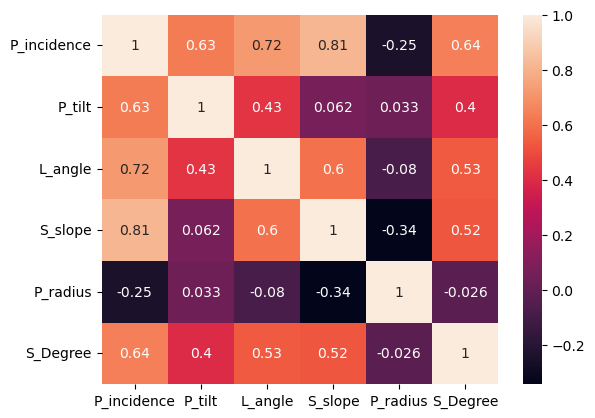

In [12]:
numerical_columns = medical_df.select_dtypes(['float']).columns
numerical_columns = [col for col in numerical_columns]
sns.heatmap(medical_df[numerical_columns].corr(), annot = True)

###  Observations on correlation

#### Observations On Strong Correleation

- 'P_incidence' have a strong positive correlation with 'P_tilt', 'L_angle', 'S_Slope' and 'S_Degree' columns.
- 'L_angle' is positively correlated with 'S_slope','P_tilt' and 'S_Degree' features.
- 'S_Degree' also have a positive correaltion with other features except 'P_radius'.

#### Observations On Weak Correleation

- 'P_radius' has a weak  correlation with 'S_Slope' and 'P_incidence' and very weak correlation wth 'P_tilt', 'L_angle' and 'S_Degree'.
- There is a weak correlation between 'P_tilt' and 'S_slope' features.

###  Let's plot a pairplot 

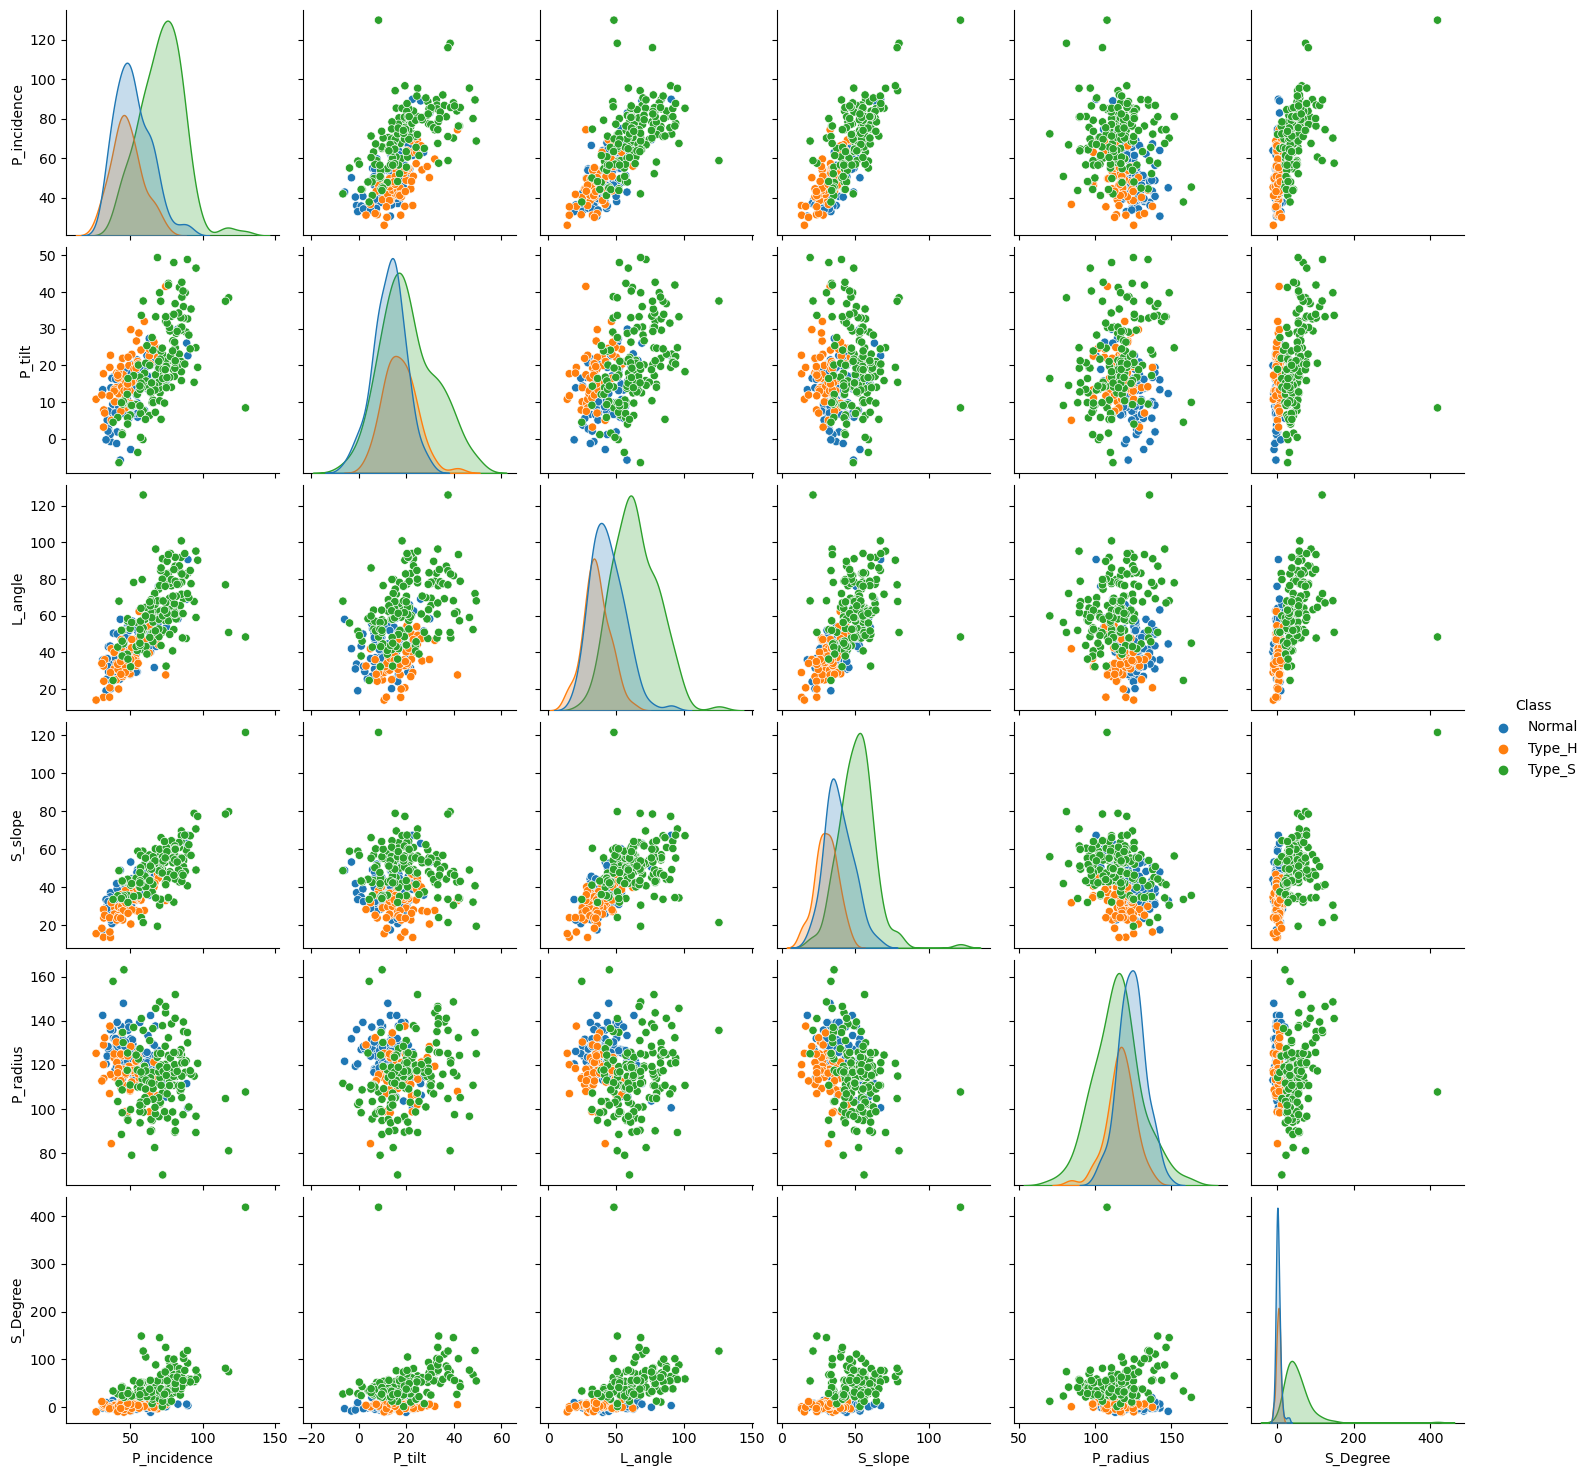

In [13]:
sns.pairplot(medical_df, hue = 'Class')

- 'P_incidence' has a strong positive correlation with 'S_slope' feature.
- 'P-radius' feature is not much correlated with others.
- From the pair plot we can observe that the 'S_Degree' column is right_skewed.

###  Let's plot a Jointplot between 'P_incidence' and 'S_slope'

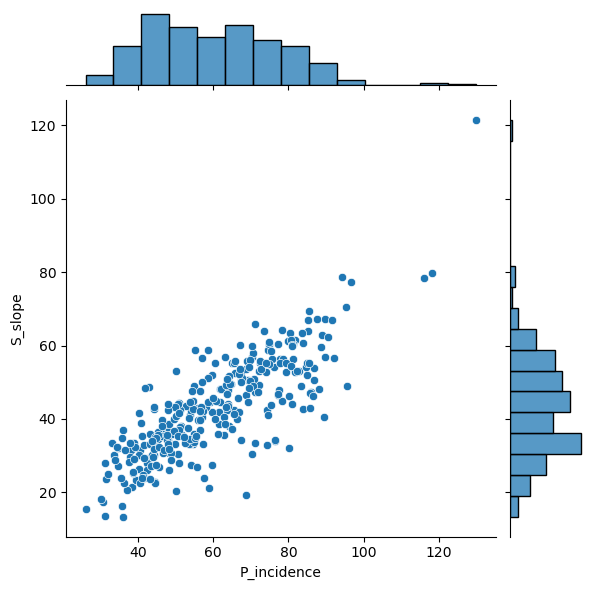

In [14]:
sns.jointplot(data = medical_df, x = 'P_incidence', y = 'S_slope')

- There is strong correlation between these two features.
- There might be outliers in both features

### Let's plot a box plot

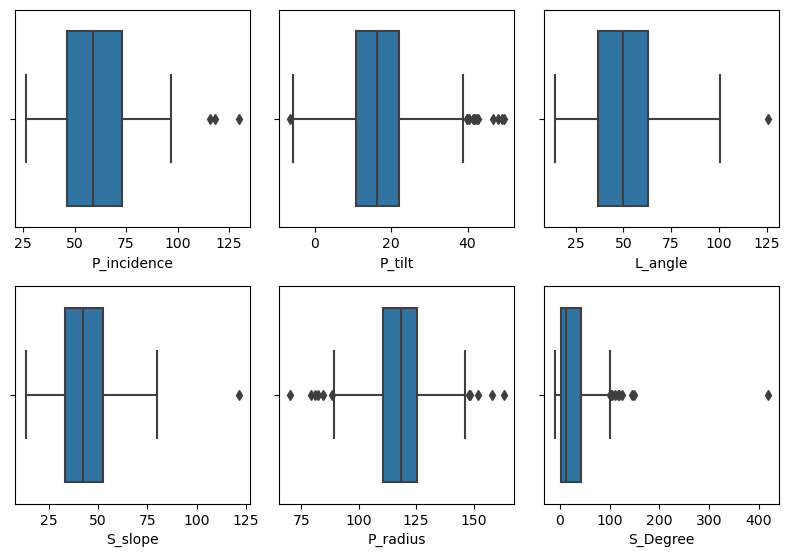

In [15]:
plt.figure(figsize = (8,8))
for i, column in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = medical_df, x = medical_df[column])
    plt.tight_layout()

- There are a few outliers in each feature.
- There is one significant outlier in 'S_Degree' feature.

### Splitting the data into X, y

In [16]:
X = medical_df.drop('Class', axis = 1)
y = medical_df[['Class']]

###  Splitting the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Let's model the data with a KNN classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier()
knn_1.fit(X_train, y_train)
y_test_predict = knn_1.predict(X_test)
y_train_predict = knn_1.predict(X_train)

###  Let's look at the performance of the model


********* Model Performance on Testing Data **********

Score =  0.8387096774193549 

              precision    recall  f1-score   support

      Normal       0.77      0.77      0.77        22
      Type_H       0.67      0.80      0.73        10
      Type_S       0.96      0.90      0.93        30

    accuracy                           0.84        62
   macro avg       0.80      0.82      0.81        62
weighted avg       0.85      0.84      0.84        62



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Type_H'), Text(0, 2.5, 'Type_S')])

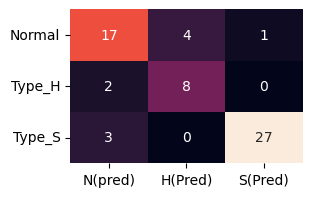

In [19]:
from sklearn.metrics import *

print("\n********* Model Performance on Testing Data **********\n")
print('Score = ', knn_1.score(X_test, y_test),'\n')
print(classification_report(y_test, y_test_predict))
cm = confusion_matrix(y_test, y_test_predict)
cm = pd.DataFrame(cm, columns = ['N(pred)', 'H(Pred)','S(Pred)'], index = ['Normal', 'Type_H', 'Type_S'])
plt.figure(figsize = (3,2))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False)
plt.yticks(rotation = 360)


*********Model Performance on Training data*********

Score =  0.8790322580645161 

              precision    recall  f1-score   support

      Normal       0.80      0.85      0.82        78
      Type_H       0.74      0.68      0.71        50
      Type_S       0.99      0.98      0.99       120

    accuracy                           0.88       248
   macro avg       0.84      0.84      0.84       248
weighted avg       0.88      0.88      0.88       248



<Axes: >

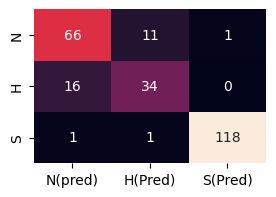

In [20]:
print("\n*********Model Performance on Training data*********\n")
print('Score = ', knn_1.score(X_train, y_train),'\n')
print(classification_report(y_train, y_train_predict))
cm = confusion_matrix(y_train, y_train_predict)
cm = pd.DataFrame(cm, columns = ['N(pred)', 'H(Pred)','S(Pred)'], index = ['N', 'H', 'S'])
plt.figure(figsize = (3,2))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False)

### Observations

- Accuracy_score of testing data is 84% and training data is 88%
-  For testing set the average score of Precision, Recall and f1_score of 'Normal' type is 77% and approximately 83% in training set.
- Only 67% of 'Type_H' are predicted correctly in test set.
- The average score of Precision, Recall and f1_score of 'Normal' type is 98% for traing data but it is not that much high in testing data.
- Our model is performing well on Training data comparing with testig data as it has high accuracy, score, precision, recall  and f1_score.

###  Let's tune the Paramrters for better performance of the model.

#### Let's perform a GridSearchCV model to get the best value for K and best metrics to increase the performance of the model.

In [21]:
print(np.sqrt(len(medical_df)))

17.60681686165901


- Let's choose the 'K' value from 1 to 17.

In [22]:
from sklearn.model_selection import GridSearchCV

knn_2 = KNeighborsClassifier()

neighbors = list(range(1,18,2))
weights = ['uniform', 'distance']
param_grid = {'n_neighbors':neighbors,
             'weights':weights,
             'metric':['euclidean', 'manhattan', 'chebyshev', 'minkiwoski']
             }
grid_CV = GridSearchCV(estimator = knn_2, param_grid = param_grid, cv = 5)
grid_CV.fit(X_train, y_train)

print("Best parameters:", grid_CV.best_params_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


- From GridSearchCV, best parameters are {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}.
- Let's look at the performance of the model.

Best score: 0.8630204081632653 

              precision    recall  f1-score   support

      Normal       0.77      0.91      0.83        22
      Type_H       0.75      0.60      0.67        10
      Type_S       0.96      0.90      0.93        30

    accuracy                           0.85        62
   macro avg       0.83      0.80      0.81        62
weighted avg       0.86      0.85      0.85        62



<Axes: >

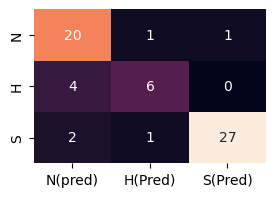

In [23]:
y_pred = grid_CV.best_estimator_.predict(X_test)
print("Best score:", grid_CV.best_score_, '\n')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns = ['N(pred)', 'H(Pred)','S(Pred)'], index = ['N', 'H', 'S'])
plt.figure(figsize = (3,2))
sns.heatmap(cm, annot = True, cbar = False, fmt = 'g')

### Observations

- Accuracy increased by 1% in new model.
- Recall and F1_score of 'Type_H' incresed by 14% and 5%.
- Precision score og "Type_H' is also increased.

### Improvement observations

- From the confusion matrices we can observe that the number of wrong predictions are reduced.
- Model score is also incresed.
- Recall, Precision and f1_scores are incresed in new model comparing with the old model.

###  Reding the datasets

In [24]:
df4 = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\Part2+-+Data1.csv')
df5 = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\Part2+-Data2.csv')

###  Let's look at the shape and columns of the data sets

In [25]:
print("df4 Shape is:", df4.shape,'\n')
print("df5 Shape is", df5.shape)

df4 Shape is: (5000, 8) 

df5 Shape is (5000, 7)


In [26]:
df4_columns = [col for col in df4.columns]
df5_columns = [col for col in df5.columns]
print("df1 columns are : ", df4_columns,'\n')
print("df2 columns are : ", df5_columns)

df1 columns are :  ['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level'] 

df2 columns are :  ['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']


In [27]:
print(df4.dtypes,'\n\n\n',df5.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object 


 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


###  Let's merge the data frames based on the 'ID' column

In [28]:
df = pd.merge(df4, df5, on = 'ID', how = 'outer')

In [29]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


###  Let's look at the types of the columns

In [30]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

- Now let's change the datatype of ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’ columns to 'Object'.

In [31]:
cols = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for i in cols:
    df[i] = df[i].astype(str)

### Let's plot the distribution of the target variable

<Axes: xlabel='LoanOnCard', ylabel='count'>

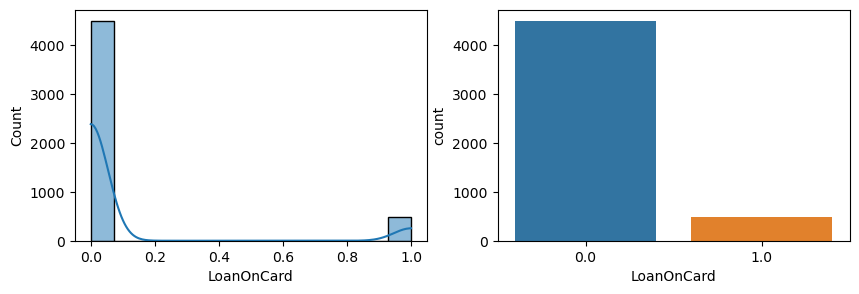

In [32]:
plt.figure(figsize = (10,3))
plt.subplot(121)
sns.histplot(df, x = 'LoanOnCard', kde = True)
plt.subplot(122)
sns.countplot(df, x = 'LoanOnCard')

- Here from the graph we can observe that the counts of the  customers who doen't have Loan is higher than the counts of the customers who took the Loan.
- Out of 5000 customers only approximately 500 people took the Loan and 4500 doen't take the Loan yet.
- We can observe that there is a class imbalance in our target variable.

###  Let's check the missing values percentage in the dataset.

In [33]:
pd.DataFrame({'count':df.isnull().sum()[df.isnull().sum()>0], 'percentage': (df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,count,percentage
LoanOnCard,20,0.4


- There are 20 missings values in our target variable and their percentage is 0.4%.
- Let's Impute these missing values with Label'0'.

In [34]:
df['LoanOnCard'] = df['LoanOnCard'].replace(np.nan,0.0)

###  Let's check for the unexpected values

In [35]:
columns = df.select_dtypes('object').columns
for column in columns:
    print(column,":", sum(df[column] == '?')+ sum(df[column] == 'a')+sum (df[column] == '1.5'))

HiddenScore : 0
Level : 0
Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0


- There are no unexpected values in the above columns.

###  Let's split the data into X and y

In [36]:
X = df.drop(['ID', 'LoanOnCard','ZipCode'], axis = 1)
y = df[['LoanOnCard']]

###  Let's split the data into training and testing

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Let's model the data with a base LogisticRegression model.

In [38]:
from sklearn.linear_model import LogisticRegression
logi_1 = LogisticRegression()
logi_1.fit(X_train, y_train)
y_test_predict = logi_1.predict(X_test)
y_train_predict = logi_1.predict(X_train)

### Let's print the metrics 

In [39]:
coeff = logi_1.coef_
coeff = [coef for coef in coeff]
columns = [col for col in X_train.columns]
for i, column in enumerate(columns):
    print(f"Coefficient for {column} : {logi_1.coef_[0][i]}")
print(f'\nIntercept =  {logi_1.intercept_}')

Coefficient for Age : -0.45473414663621364
Coefficient for CustomerSince : 0.47374965292711857
Coefficient for HighestSpend : 0.04680728226962762
Coefficient for HiddenScore : 0.47988283975811086
Coefficient for MonthlyAverageSpend : 0.06966982466517836
Coefficient for Level : 1.4591365069920479
Coefficient for Mortgage : 0.0008461105289256995
Coefficient for Security : 0.10485107130424942
Coefficient for FixedDepositAccount : 2.192004571206598
Coefficient for InternetBanking : -0.3857151792097895
Coefficient for CreditCard : -0.63700526090488

Intercept =  [-0.33064983]


AUC_SCORE=  0.78372920344514 

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1116
         1.0       0.91      0.57      0.70       134

    accuracy                           0.95      1250
   macro avg       0.93      0.78      0.84      1250
weighted avg       0.95      0.95      0.94      1250



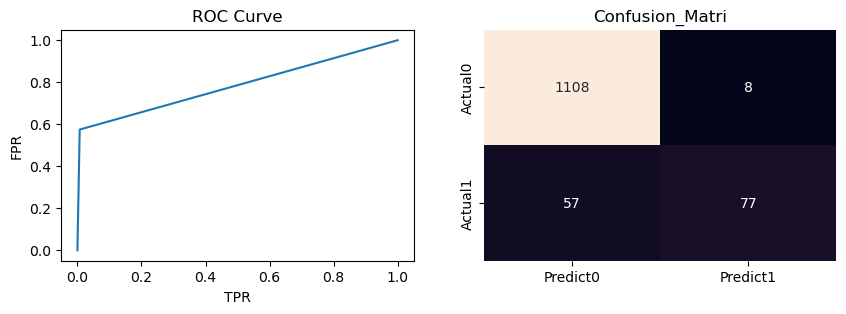

In [40]:
# Let's create a function to execute all the metrics.
def metrics(test_train, predicted):
    fpr,tpr, thresholds = roc_curve(test_train, predicted)
    print('AUC_SCORE= ',roc_auc_score(test_train,predicted),'\n')
    print(classification_report(test_train, predicted))
    plt.figure(figsize = (10,3))
    plt.subplot(121)
    plt.plot(fpr,tpr)
    plt.xlabel('TPR') 
    plt.ylabel('FPR')
    plt.title('ROC Curve')
    cm = confusion_matrix(test_train, predicted)
    cm = pd.DataFrame(cm, index = ['Actual0', 'Actual1'], columns = ['Predict0', 'Predict1'])
    plt.subplot(122)
    plt.title('Confusion_Matri')
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'g')
metrics(y_test, y_test_predict)

- Model Accuracy is 95%.
- roc_auc_score of the model is = 78%.
- Rrecall, f1_score of label_'0' are good but scores of label_'1' are low.
- This is because our target variable has Imbalanced data.

AUC_SCORE=  0.7788066402668061 

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3404
         1.0       0.83      0.57      0.68       346

    accuracy                           0.95      3750
   macro avg       0.89      0.78      0.82      3750
weighted avg       0.95      0.95      0.95      3750



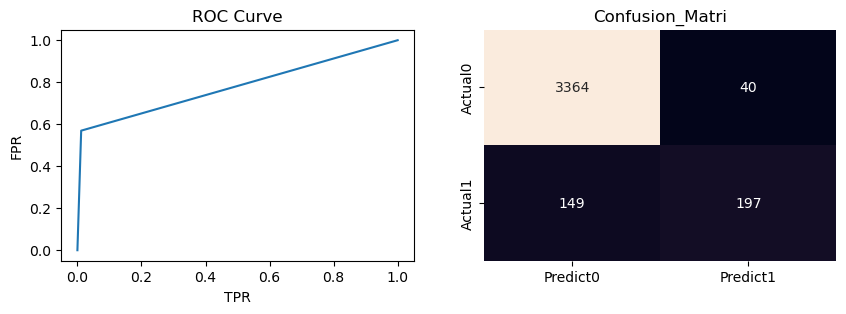

In [41]:
metrics(y_train, y_train_predict)

- From the metrics on both training and testing, model's Precision, recall and f1_score of Label_'0' are high but scores of label_'1' are not good.

 ### Let's balance the biased data with SMOTE

- From the countplot and histplot we can see that data points are not balanced in the target variable.
- 90.4% of the data is of label_'0' and only 9.6% of the data points are of label_'1'.

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled,y_resampled = smote.fit_resample(X_train, y_train)
counts_1 = df['LoanOnCard'].value_counts(normalize = True)
counts_2 = y_resampled['LoanOnCard'].value_counts(normalize =True)

print("Counts of label_1 before Resampling = ", y_train[y_train['LoanOnCard'] == 1].value_counts()[1],'(',counts_1[0]*100,'%)')
print("Counts of label_1 before Resampling = ", y_train[y_train['LoanOnCard'] == 0].value_counts()[0],'(',counts_1[1]*100,'%)\n')
print("Counts of label_1 before Resampling = ", y_resampled[y_resampled['LoanOnCard'] == 1].value_counts()[1],'(',counts_2[1]*100,'%)')
print("Counts of label_1 before Resampling = ", y_resampled[y_resampled['LoanOnCard'] == 0].value_counts()[0],'(',counts_2[1]*100,'%)\n')

Counts of label_1 before Resampling =  346 ( 90.4 %)
Counts of label_1 before Resampling =  3404 ( 9.6 %)

Counts of label_1 before Resampling =  3404 ( 50.0 %)
Counts of label_1 before Resampling =  3404 ( 50.0 %)



- Here we can observe that after Resampling the data with SMOTE, now the data is balanced.
- Now we have 50% of the data from Class_1 and 50% of the data from Class_0.

###  Let's model the balanced data.

AUC_SCORE=  0.891309581126625 

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1116
         1.0       0.49      0.90      0.63       134

    accuracy                           0.89      1250
   macro avg       0.74      0.89      0.78      1250
weighted avg       0.93      0.89      0.90      1250



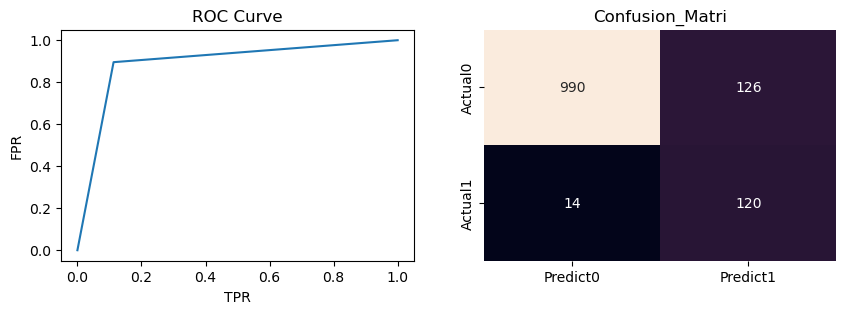

In [43]:
logi_2 = LogisticRegression()
logi_2.fit(X_resampled, y_resampled)
resampled_y_predict = logi_2.predict(X_test)
metrics(y_test, resampled_y_predict)

###  Observations

- roc_auc_score increased by 11%.
- Accuracy score is 89% in balanced data but accuracy score of base model is 95%.
- But after balancing the data, logistic regression is still biased as the scores of the Precision, Recall and F1_score are low..

### Performance Improvement

###  Let's model SVM and KNN models on Resampled data

AUC_SCORE=  0.8771130904616701 

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1116
         1.0       0.39      0.93      0.55       134

    accuracy                           0.84      1250
   macro avg       0.69      0.88      0.73      1250
weighted avg       0.93      0.84      0.86      1250



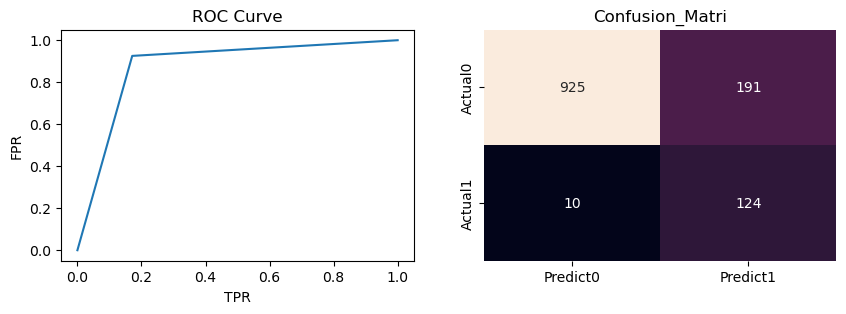

In [44]:
from sklearn.svm import SVC
svm_1 = SVC()
svm_1.fit(X_resampled, y_resampled)
svm1_y_predicted = svm_1.predict(X_test)
metrics(y_test, svm1_y_predicted)

AUC_SCORE=  0.8165289145669503 

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      1116
         1.0       0.42      0.76      0.54       134

    accuracy                           0.86      1250
   macro avg       0.69      0.82      0.73      1250
weighted avg       0.91      0.86      0.88      1250



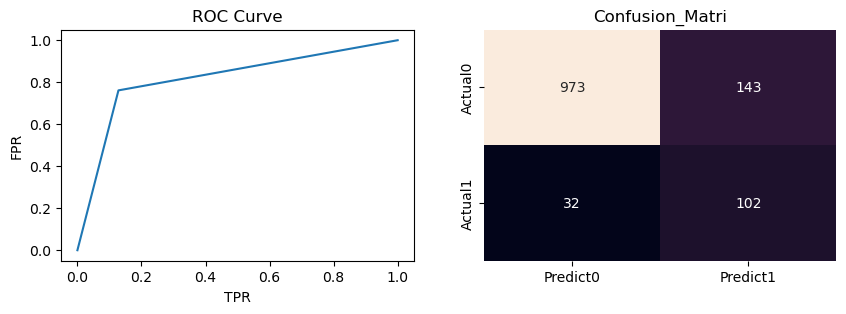

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier()
knn_1.fit(X_resampled, y_resampled)
knn1_y_predicted = knn_1.predict(X_test)
metrics(y_test, knn1_y_predicted)

- These two model's performance is also not good.
- roc_auc_scores of these models are increased but the models are still biased towards minority class.

### Let's Tune the Hyper parameters for better performance of the model.

In [46]:
np.sqrt(df.shape[0])

70.71067811865476

In [47]:
neighbors = range(3,70,2)
weights = ['uniform', 'distance']
knn_param_grid = dict(n_neighbors = neighbors, weights = weights, p = [1,2])
knn_cv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knn_param_grid, cv = 10)
knn_cv.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 70, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

Best metrics are =  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score is =  0.9557899283061241
AUC_SCORE=  0.8534076927191997 

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      1116
         1.0       0.53      0.79      0.63       134

    accuracy                           0.90      1250
   macro avg       0.75      0.85      0.79      1250
weighted avg       0.93      0.90      0.91      1250



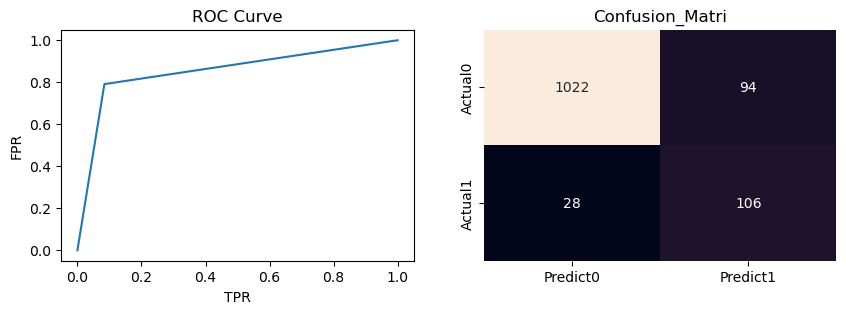

In [48]:
print("Best metrics are = ",knn_cv.best_params_)
print("Best Score is = ",knn_cv.best_score_)

pred = knn_cv.best_estimator_.predict(X_test)
metrics(y_test, pred)

- From the GridSearchCV,  best_K = 3, p = 1(manhattan) and weights is distance.
- Let's model the data using these parameters.

- New KNN model's AUC_score is85%.
- This model is also not much performing as it has precision score is 53% for label_'1'.
- From Confusion_matrix also we can see that the model is predicting lot of Actual 0's as 1.

In [49]:
param_grid = {'C':[0.001,0.01,0.1,1,100,1000],
             'gamma':[0.001,0.01,0.1,1,100,1000]}
svm_cv = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = 5)

In [50]:
svm_cv.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 100, 1000]})

Best Values =  {'C': 1000, 'gamma': 0.001}
Best Score =  0.9784082706742581
AUC_SCORE=  0.8492416947520463 

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      1116
         1.0       0.69      0.74      0.71       134

    accuracy                           0.94      1250
   macro avg       0.83      0.85      0.84      1250
weighted avg       0.94      0.94      0.94      1250



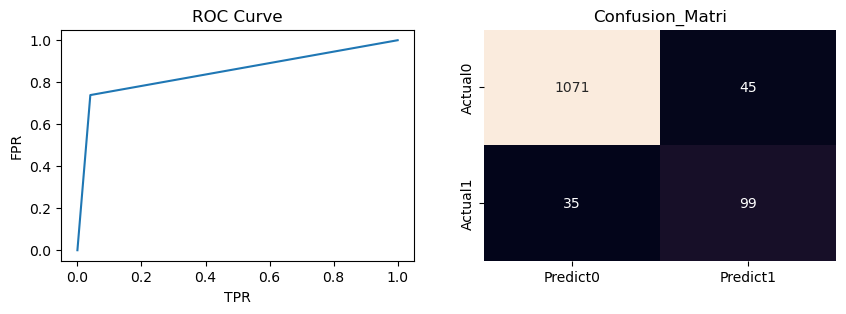

In [51]:
print("Best Values = ",svm_cv.best_params_)
print("Best Score = ",svm_cv.best_score_)
pred = svm_cv.best_estimator_.predict(X_test)
metrics(y_test, pred)

- From GridSearchCv best parameters are {'C': 1000, 'gamma': 0.001}.

###  Observations

- There is no such difference in AUC_score between the old and new models.
- The scores for lable_'1' were biased in old SVM model but after tuning the Hyper parameters the scores are incresed well.
- FP score for svm_1 is 197 but it decresed to 45 in new SVM model.
- Accuracy score is increased by 10% in svm_2 model.
- Overall the scores of the new SVM model are increased.